In [1]:
import os
import requests
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import json

%matplotlib inline

In [3]:
#Read in ETF data
ARKF_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/ETF_Data/ARKF.csv')
arkk_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/ETF_Data/ARKK.csv')
arkq_path = Path('/Users/whitneyturner/Project-FI-Data/Performance_Data/ETF_Data/ARKQ.csv')
arkf_data = pd.read_csv(ARKF_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
arkk_data = pd.read_csv(arkk_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
arkq_data = pd.read_csv(arkq_path,index_col="Date", parse_dates=True, infer_datetime_format=True)

In [4]:
#Find ETF Daily Returns
arkf_close = arkf_data['Close']
arkk_close = arkk_data['Close']
arkq_close = arkq_data['Close']
arkf_daily_returns = pd.DataFrame(arkf_close.pct_change())
arkk_daily_returns = pd.DataFrame(arkk_close.pct_change())
arkq_daily_returns = pd.DataFrame(arkq_close.pct_change())

In [5]:
#Combine ETF Daily Returns into one data framerame
arkf_daily_returns1 = arkf_daily_returns.rename(columns={'Close': 'ARKF'})
arkk_daily_returns1 = arkk_daily_returns.rename(columns={'Close': 'ARKK'})
arkq_daily_returns1 = arkq_daily_returns.rename(columns={'Close': 'ARKQ'})
etf_df = pd.concat([arkf_daily_returns1, arkk_daily_returns1, arkq_daily_returns1], axis = 'columns', join = 'inner').dropna()

In [6]:
#display ETF dataframe
etf_df.head()

,ARKF,ARKK,ARKQ
Date,,,
2019-02-05 16:00:00,0.008845,0.002740,0.012771
2019-02-06 16:00:00,-0.002923,0.000911,0.003226
2019-02-07 16:00:00,-0.014656,-0.033439,-0.032154
2019-02-08 16:00:00,0.000992,0.011767,0.005134
2019-02-11 16:00:00,0.004458,0.010002,0.011118


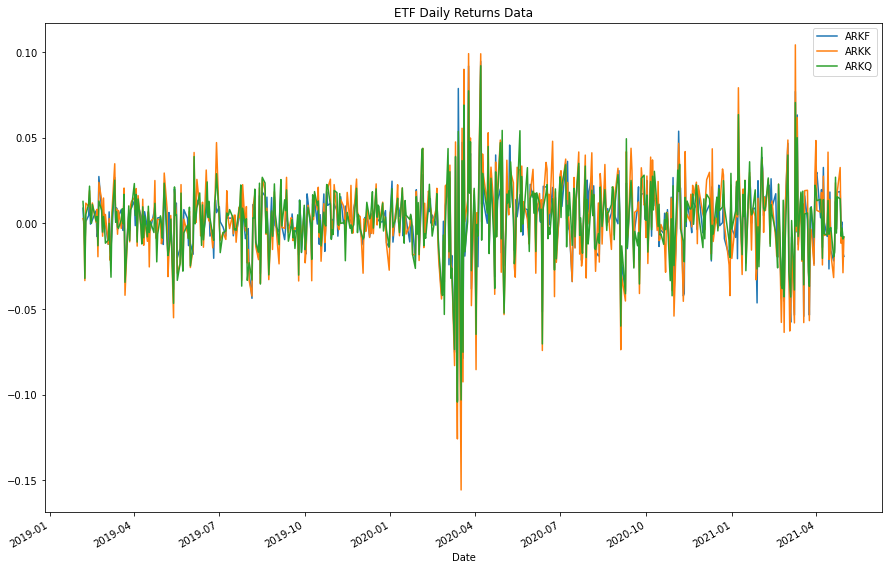

In [7]:
#plot ETF Performance
etf_plot = etf_df.plot(title = 'ETF Daily Returns Data', figsize =(15,10))

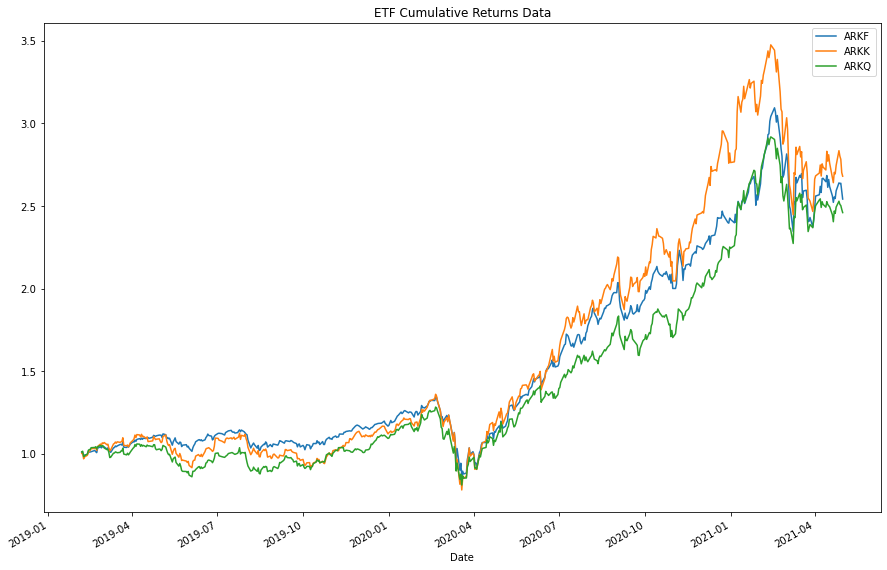

In [8]:
# Calculate and plot ETF Cumulative Return Over 3 years
etf_cumulative = (1 + etf_df).cumprod()
etf_cumulative_plot = etf_cumulative.plot(title = 'ETF Cumulative Returns Data', figsize = (15,10))

In [9]:
# Export DataFrame to CSV
etf_df.to_csv('ETF_Daily_returns')